In [1]:
# !pip install -U datasets huggingface_hub fsspec

In [2]:
import torch
import torch.nn as nn
import pandas as pd
# from transformers import TinyTimeMixerForPrediction, AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling, pipeline
# from datasets import load_dataset, Dataset, concatenate_datasets
# from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
import json
import os
import matplotlib.pyplot as plt
# import accelerate
'''
Thrust curver data was collected from thrustcurve.org
Info about the API and Terms of Service: https://www.thrustcurve.org/info/api.html
'''

'\nThrust curver data was collected from thrustcurve.org\nInfo about the API and Terms of Service: https://www.thrustcurve.org/info/api.html\n'

In [3]:
# https://www.thrustcurve.org/info/api.html

In [4]:
work_dir = os.getcwd()
data_dir = work_dir.replace("GitHub/RocketPill/ipynb-notebooks", "Data/")
thrust_curves_data_path = data_dir + "thrust_curves_normalized.csv"
models_path = work_dir.replace("GitHub/RocketPill/ipynb-notebooks", "Deep_Learning_Models/") 
thrust_curves_data_file_name_pattern = f"thrust_curves_normalized"

In [5]:
print(f'work_dir: {work_dir}')
print(f'data_dir: {data_dir}')
print(f'models_path: {models_path}')

work_dir: /Users/rckyi/Documents/GitHub/RocketPill/ipynb-notebooks
data_dir: /Users/rckyi/Documents/Data/
models_path: /Users/rckyi/Documents/Deep_Learning_Models/


In [6]:
# work_dir = os.getcwd()
# data_dir = os.getcwd().replace("GitHub/RocketPill/ipynb-notebooks", "Data/")
# thrust_curves_files_id = "thrust_curves_normalized.csv"
# models_path = os.getcwd().replace("GitHub/RocketPill/ipynb-notebooks", "Deep_Learning_Models/") 

In [7]:
ls = [data_dir + x for x in os.listdir(data_dir) if thrust_curves_data_file_name_pattern in x ]

In [8]:
lsf = [ pd.read_csv(f) for f in ls]
df = pd.concat(lsf)

In [9]:
df[0:25]

,time,thrust,motorId,motor_name,impulse_class
0,0.000000,0.000000,5f4294d200023100000000f7,J245-BG,J
1,0.000000,1.000000,5f4294d200023100000000f7,J245-BG,J
2,0.053367,0.800001,5f4294d200023100000000f7,J245-BG,J
3,0.401317,0.692308,5f4294d200023100000000f7,J245-BG,J
4,0.787695,0.415384,5f4294d200023100000000f7,J245-BG,J
5,0.823985,0.230769,5f4294d200023100000000f7,J245-BG,J
6,0.870947,0.153846,5f4294d200023100000000f7,J245-BG,J
7,1.000000,0.000000,5f4294d200023100000000f7,J245-BG,J
8,0.000000,0.000000,5f4294d20002310000000416,644J94-P,J
9,0.000722,0.115490,5f4294d20002310000000416,644J94-P,J


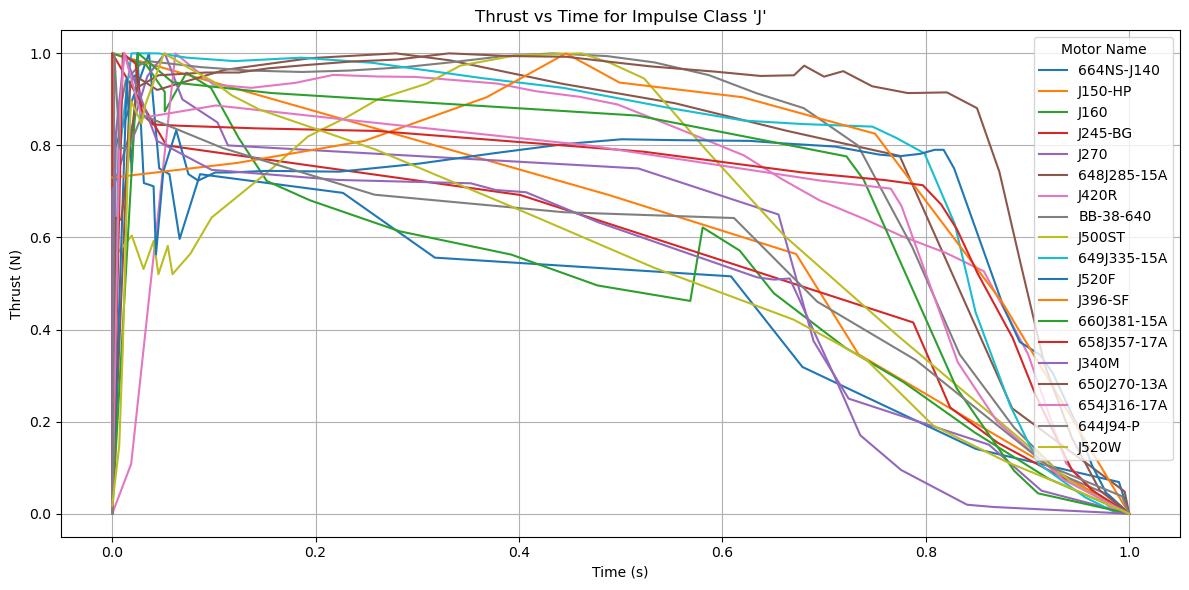

In [10]:
import pandas as pd


# Assume your DataFrame is named df
# Filter for impulse_class 'J'
df_j = df[df['impulse_class'] == 'J']

# Sort by time for proper plotting
df_j = df_j.sort_values(by='time')

# Plot
plt.figure(figsize=(12, 6))

# Group by motorId to label segments
for motor_id, group in df_j.groupby('motorId'):
    plt.plot(group['time'], group['thrust'], label=group['motor_name'].iloc[0])

plt.title("Thrust vs Time for Impulse Class 'J'")
plt.xlabel("Time (s)")
plt.ylabel("Thrust (N)")
plt.legend(title="Motor Name")
plt.grid(True)
plt.tight_layout()
plt.show()


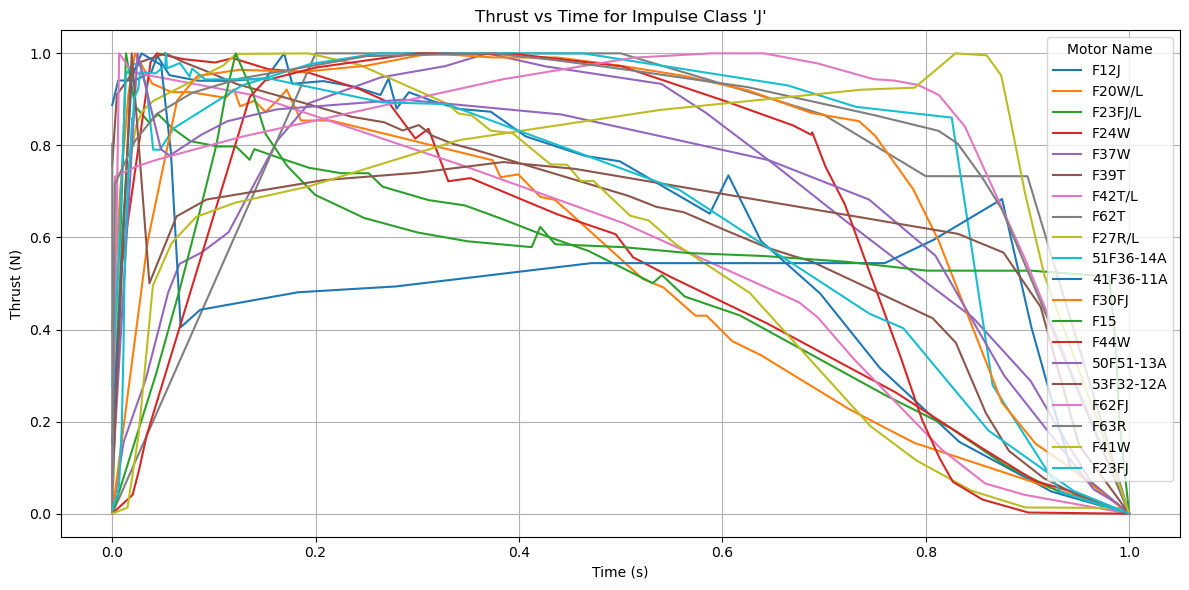

In [11]:
import pandas as pd


# Assume your DataFrame is named df
# Filter for impulse_class 'J'
df_j = df[df['impulse_class'] == 'F']

# Sort by time for proper plotting
df_j = df_j.sort_values(by='time')

# Plot
plt.figure(figsize=(12, 6))

# Group by motorId to label segments
for motor_id, group in df_j.groupby('motorId'):
    plt.plot(group['time'], group['thrust'], label=group['motor_name'].iloc[0])

plt.title("Thrust vs Time for Impulse Class 'J'")
plt.xlabel("Time (s)")
plt.ylabel("Thrust (N)")
plt.legend(title="Motor Name")
plt.grid(True)
plt.tight_layout()
plt.show()

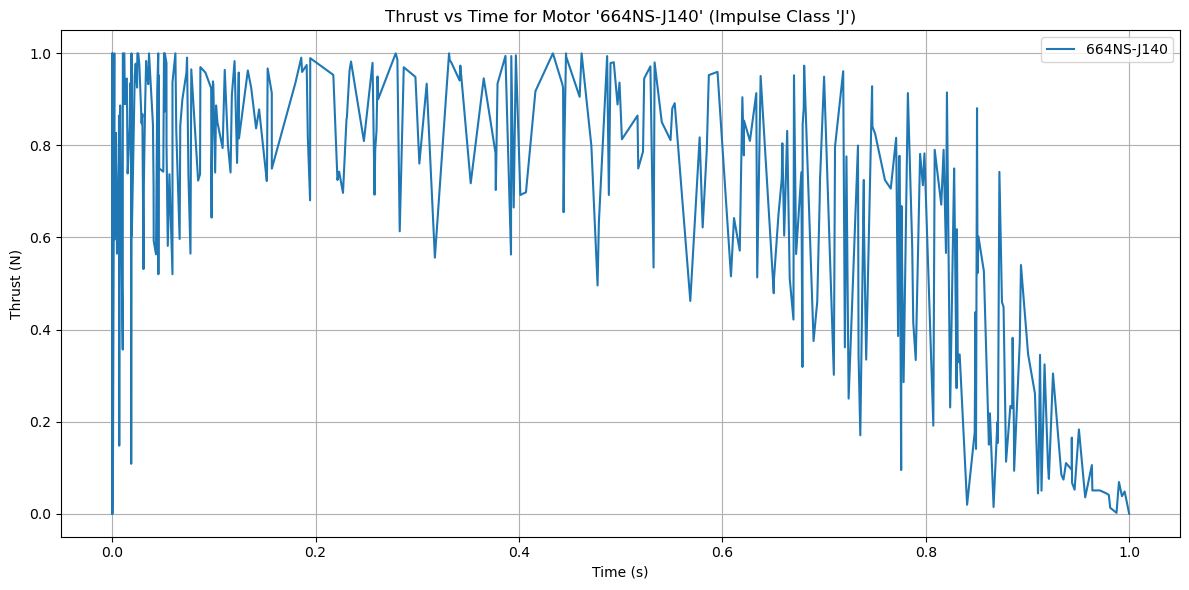

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for impulse_class 'J' and motor_name '664NS-J140'
filtered_df = df[
    (df['impulse_class'] == 'J') 
    # & (df['motor_name'] == '664NS-J140')
]

# Sort by time for proper plotting
filtered_df = filtered_df.sort_values(by='time')

# Plot
plt.figure(figsize=(12, 6))

plt.plot(filtered_df['time'], filtered_df['thrust'], label='664NS-J140')

plt.title("Thrust vs Time for Motor '664NS-J140' (Impulse Class 'J')")
plt.xlabel("Time (s)")
plt.ylabel("Thrust (N)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


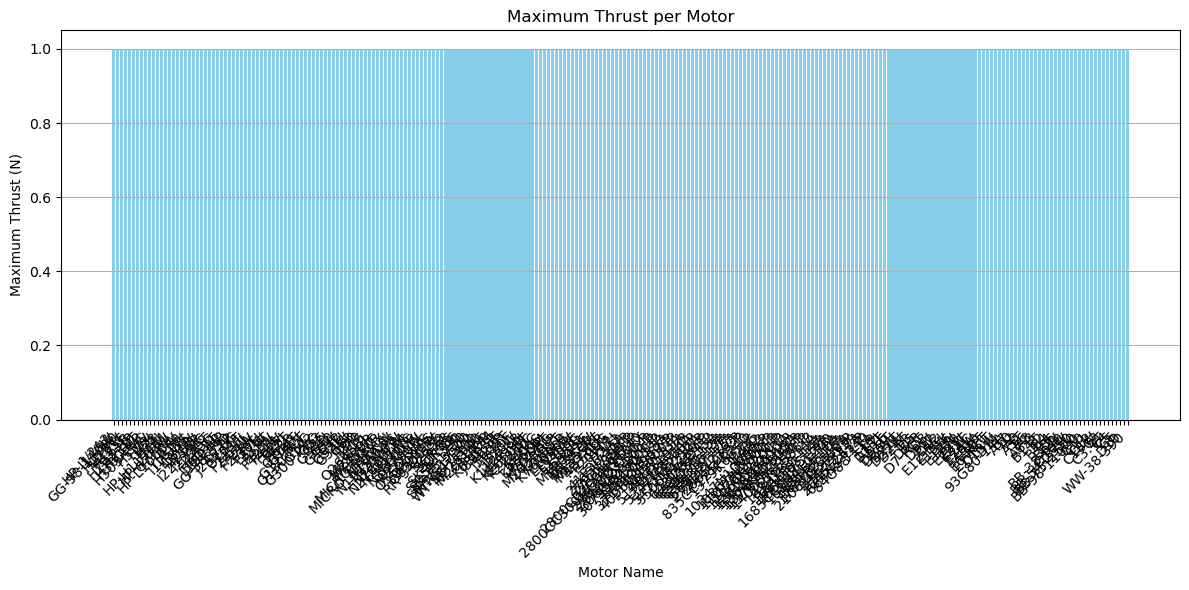

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by motor_name and compute the maximum thrust for each group
max_thrust_per_motor = df.groupby('motor_name')['thrust'].max().reset_index()

# Sort by thrust (optional, for cleaner visualization)
max_thrust_per_motor = max_thrust_per_motor.sort_values(by='thrust', ascending=False)

# Plot as bar chart
plt.figure(figsize=(12, 6))
plt.bar(max_thrust_per_motor['motor_name'], max_thrust_per_motor['thrust'], color='skyblue')

plt.title('Maximum Thrust per Motor')
plt.xlabel('Motor Name')
plt.ylabel('Maximum Thrust (N)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [17]:
df.head()

,time,thrust,motorId,motor_name,impulse_class
0,0.000000,0.000000,5f4294d200023100000000f7,J245-BG,J
1,0.000000,1.000000,5f4294d200023100000000f7,J245-BG,J
2,0.053367,0.800001,5f4294d200023100000000f7,J245-BG,J
3,0.401317,0.692308,5f4294d200023100000000f7,J245-BG,J
4,0.787695,0.415384,5f4294d200023100000000f7,J245-BG,J


In [21]:
df.iloc[2, df.columns.get_loc('time')]

0.0533667938931297

In [54]:
time_windows = []
thrust_windows = []
motor_name_windows = []
impulse_class_windows = []

# start_indices = []
curr_window_time = []
curr_window_thrust = []
curr_window_motor_name = []
curr_window_impulse_class = []


for i in range(len(df)):
    t0 = df.iloc[i, df.columns.get_loc('time')]
    thrust = df.iloc[i, df.columns.get_loc('thrust')]
    motor_name = df.iloc[i, df.columns.get_loc('motor_name')]
    impulse_class = df.iloc[i, df.columns.get_loc('impulse_class')]
    # print(f't0 {type(t0)}')
    if t0 == 0.0:
        curr_window_time = []
        curr_window_thrust = []
        curr_window_motor_name = []
        curr_window_impulse_class = []
    elif t0 > 0.0 and t0 < 1.0:
        curr_window_time.append(t0)
        curr_window_thrust.append(thrust)
        curr_window_motor_name.append(motor_name)
        curr_window_impulse_class.append(impulse_class)
    elif t0 == 1.0:
        curr_window_time.append(t0)
        curr_window_thrust.append(thrust)
        curr_window_motor_name.append(motor_name)
        curr_window_impulse_class.append(impulse_class)
        
        time_windows.append(curr_window_time)
        thrust_windows.append(curr_window_thrust)
        motor_name_windows.append(curr_window_motor_name)
        impulse_class_windows.append(curr_window_impulse_class)
        
   


In [61]:
tdf = pd.DataFrame({'time_window': time_windows})
tdf.head()

In [ ]:
# pd.DataFrame({'time_window': time_windows})
# , pd.DataFrame({'thrust_window': thrust_windows})
# , pd.DataFrame({'motor_name': motor_name_windows})
# , pd.DataFrame({'impulse_class': impulse_class_windows})

In [73]:
window_df = pd.DataFrame({'time_window': time_windows
                          , 'thrust_window': thrust_windows
                          , 'motor_name': motor_name_windows
                          , 'impulse_class': impulse_class_windows})

In [74]:
window_df.head()

,time_window,thrust_window,motor_name,impulse_class
0,"[0.0533667938931297, 0.4013167938931297, 0.787...","[0.800000899236099, 0.6923083840277684, 0.4153...","[J245-BG, J245-BG, J245-BG, J245-BG, J245-BG, ...","[J, J, J, J, J, J]"
1,"[0.0007217090069284, 0.0020207852193995, 0.007...","[0.1154904355869691, 1.0, 0.7943680846269703, ...","[644J94-P, 644J94-P, 644J94-P, 644J94-P, 644J9...","[J, J, J, J, J, J, J, J, J, J, J, J, J, J]"
2,"[0.0143426294820717, 0.0191235059760956, 0.024...","[0.9454233664183034, 0.7429588165385054, 1.0, ...","[J520F, J520F, J520F, J520F, J520F, J520F, J52...","[J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, ..."
3,"[0.0176991150442477, 0.0221238938053097, 0.035...","[0.9351405513730164, 0.9520392135622596, 0.933...","[648J285-15A, 648J285-15A, 648J285-15A, 648J28...","[J, J, J, J, J, J, J, J, J, J, J, J, J, J, J]"
4,"[0.0344827586206896, 0.0517241379310344, 0.068...","[0.9500113301608882, 1.0, 0.9, 0.8500113301608...","[J270, J270, J270, J270, J270, J270, J270, J27...","[J, J, J, J, J, J, J, J, J, J, J, J]"
